In [1]:
pip install wikipedia

  Preparing metadata (setup.py) ... - done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=0fc3e6808c9043c9cc7fc42868687709243340ea882cfac1a1e30f9d1db9d7b4
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.


In [2]:
import wikipedia

# Set a custom user agent to comply with Wikipedia's policy
wikipedia.set_user_agent("My Wikipedia Scraping Bot (youremail@example.com)")

# List of Wikipedia page titles
page_titles = [
    "Machine learning",
    "Deep learning",
    "Natural Language Processing", 
    "Recurrent neural network", 
    "Convolutional neural network", 
]
# Dictionary to store page titles and their content
documents = {}

# Number of pages to fetch for each document topic
num_pages_per_topic = 10

# Fetch content for each page
for title in page_titles:
    try:
        # Fetch the page content
        pages = wikipedia.search(title, results=num_pages_per_topic, suggestion=False)

        # Store the title and content in the dictionary
        documents[title] = "\n".join([wikipedia.page(page).content for page in pages])
    except wikipedia.exceptions.PageError:
        print("Page '{}' does not exist.".format(title))
    except wikipedia.exceptions.DisambiguationError as e:
        print("Page '{}' is a disambiguation page. Skipping.".format(title))

# Combine all content into one string
all_content = "\n".join(documents.values())

# Print the combined content
print("Combined Content:")
print(all_content[:500])  # Print only the first 500 characters for demonstration


Page 'Machine learning' does not exist.
Combined Content:
Deep learning is the subset of machine learning methods based on neural networks with representation learning. The adjective "deep" refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.
Deep-learning architectures such as deep neural networks, deep belief networks, recurrent neural networks, convolutional neural networks and transformers have been applied to fields including computer vision, speech recognition, natural langua


In [3]:
len(all_content)

1085195

In [4]:
import re
import numpy as np
import nltk
import spacy

import matplotlib.pyplot as plt

from spacy.cli import download
from spacy import load
import warnings

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [5]:
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet2022')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


True

In [6]:
class preprocessing:
    def __init__(self,text):
        self.text=text
        self.words=None
    def clear(self):
        clean = re.compile('<.*?>')
        self.text =  re.sub(clean, '', self.text)
        self.text= re.sub(r"[^a-zA-Z]"," ",self.text)
        self.text = re.sub(r'\s+', ' ', self.text)
    def Normalization(self):
        self.text=self.text.lower()
#         print(self.text)
    def Tokenization(self):
        self.words = word_tokenize(self.text)
#         print(self.words)
    def del_stop_words(self):
        stop_words = set(stopwords.words('english'))
        self.words=[word for word in self.words if (word not in stop_words)]
        
    def stemming(self):
        stemmer = PorterStemmer()
        self.words = [stemmer.stem(word) for word in self.words]
    def unique_words(self):
        self.words = list(set(self.words))
        return self.words
    def return_string(self):
        return ' '.join(self.words)
    def del_char (self):
        self.words=[word for word in self.words if (len(word)>1)]
        return self.words

In [7]:
def clean_document (document):
    cleaner = preprocessing(document)
    cleaner.clear()
    cleaner.Tokenization()
    cleaner.Normalization()
    cleaner.del_stop_words()
    cleaner.stemming()
    cleaner.del_char()
    output = cleaner.return_string()
    return output

In [8]:
clear = clean_document(all_content)

In [9]:
clear[:1500]

'deep learn subset machin learn method base neural network represent learn the adject deep refer use multipl layer network method use either supervis semi supervis unsupervis deep learn architectur deep neural network deep belief network recurr neural network convolut neural network transform appli field includ comput vision speech recognit natur languag process machin translat bioinformat drug design medic imag analysi climat scienc materi inspect board game program produc result compar case surpass human expert perform earli form neural network inspir inform process distribut commun node biolog system particular human brain howev current neural network intend model brain function organ gener seen low qualiti model purpos overview most modern deep learn model base multi layer neural network convolut neural network transform although also includ proposit formula latent variabl organ layer wise deep gener model node deep belief network deep boltzmann machin fundament deep learn refer cl

In [10]:
chars = sorted(set(clear))  # Unique characters in input text
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # Character to index mapping
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # Index to character mapping


In [11]:
indices_to_chars

{0: ' ',
 1: 'A',
 2: 'B',
 3: 'C',
 4: 'D',
 5: 'E',
 6: 'F',
 7: 'G',
 8: 'H',
 9: 'I',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'a',
 26: 'b',
 27: 'c',
 28: 'd',
 29: 'e',
 30: 'f',
 31: 'g',
 32: 'h',
 33: 'i',
 34: 'j',
 35: 'k',
 36: 'l',
 37: 'm',
 38: 'n',
 39: 'o',
 40: 'p',
 41: 'q',
 42: 'r',
 43: 's',
 44: 't',
 45: 'u',
 46: 'v',
 47: 'w',
 48: 'x',
 49: 'y',
 50: 'z'}

In [12]:
maxlen = 5  # Maximum length of input sequence
step = 3  # Step size for creating input sequences
sentences = []  # List to store input sequences
next_chars = []  # List to store next characters

In [13]:
for i in range(0, len(clear) - maxlen, step):
    sentences.append(clear[i:i + maxlen])
    next_chars.append(clear[i + maxlen])

In [14]:
sentences[:5]

['deep ', 'p lea', 'earn ', 'n sub', 'ubset']

In [15]:
x_char = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)  # Initialize input data tensor
y_char = np.zeros((len(sentences), len(chars)), dtype=bool)  # Initialize target data tensor


In [16]:
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x_char[i, t, chars_to_indices[char]] = 1
    y_char[i, chars_to_indices[next_chars[i]]] = 1

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_char, y_char, test_size=0.2, random_state=42)


In [18]:
import tensorflow as tf 

2024-05-17 22:48:03.449124: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 22:48:03.449215: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 22:48:03.567057: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
from tensorflow.keras.layers import Dense, SimpleRNN


In [20]:
model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(128, return_sequences=True, input_shape=(maxlen, len(chars))),
    tf.keras.layers.Dropout(0.2),  # Adding dropout after the LSTM layer
    tf.keras.layers.LSTM(128, return_sequences=True),  # Adding LSTM layer with return_sequences=True
    tf.keras.layers.LSTM(128),  # Adding another LSTM layer without return_sequences=True
    tf.keras.layers.Dropout(0.2),  # Adding dropout after the LSTM layer
    tf.keras.layers.Dense(len(chars), activation='softmax')
])

model_rnn.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy' , 'recall' , 'precision' , 'f1_score']
)


model_rnn.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 5, 128)         │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 5, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 51)             │         6,579 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,787 (1.12 MB)

 Trainable params: 292,787 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model_rnn.fit(x_train, y_train, batch_size = 128 , epochs=100 , validation_data=(x_test , y_test))

Epoch 1/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.2088 - f1_score: 0.0344 - loss: 2.7648 - precision: 0.5713 - recall: 0.0458 - val_accuracy: 0.4065 - val_f1_score: 0.1385 - val_loss: 1.9889 - val_precision: 0.8059 - val_recall: 0.1932
Epoch 2/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4308 - f1_score: 0.1576 - loss: 1.9184 - precision: 0.7858 - recall: 0.2389 - val_accuracy: 0.5267 - val_f1_score: 0.2114 - val_loss: 1.6042 - val_precision: 0.8311 - val_recall: 0.3635
Epoch 3/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5243 - f1_score: 0.2105 - loss: 1.6023 - precision: 0.8170 - recall: 0.3737 - val_accuracy: 0.5695 - val_f1_score: 0.2360 - val_loss: 1.4439 - val_precision: 0.8317 - val_recall: 0.4411
Epoch 4/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5653 - f1_score: 0.2414 - loss: 1.4540 - precision: 0.8289 - recall: 0.4350 - val_accuracy: 0.5883 - val_f1_score: 0.2703 - val_loss: 1.3665 - val_precision: 

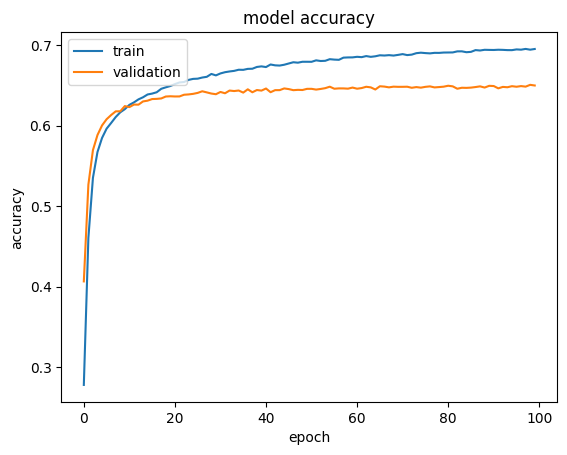

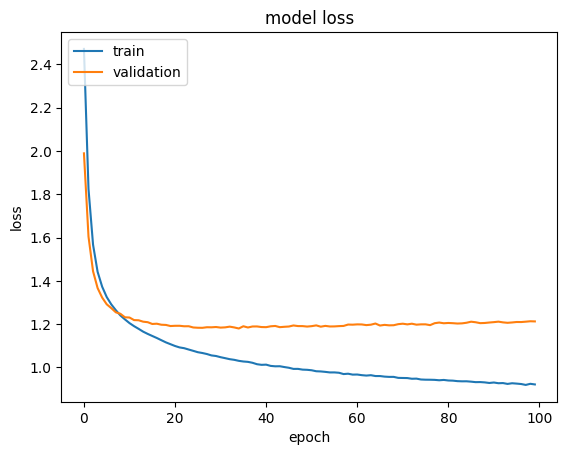

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
results = model_rnn.evaluate(x_test,y_test)
# print('Testing Accuracy is {} '.format(accuracy*100))

1239/1239 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6507 - f1_score: 0.3284 - loss: 1.2057 - precision: 0.8147 - recall: 0.5867


In [24]:
print(results)

[1.212477207183838, 0.6498081684112549, 0.5855541825294495, 0.8119117021560669, <tf.Tensor: shape=(51,), dtype=float32, numpy=
array([0.92022014, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.6666666 , 0.16666664,
       0.        , 0.8571428 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.66666657, 0.72727275,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5638101 , 0.3987823 , 0.46461535, 0.5136116 , 0.6896642 ,
       0.41641635, 0.6709401 , 0.64551723, 0.6034628 , 0.37142852,
       0.7712418 , 0.6103363 , 0.49308956, 0.69000584, 0.6434071 ,
       0.47829178, 0.35164827, 0.68079144, 0.49732473, 0.6472534 ,
       0.6050708 , 0.43266472, 0.57553947, 0.5885416 , 0.64918023,
       0.37499997], dtype=float32)>]


In [25]:
# Prediction for the next letter
def predict_next_char(model, input_text, chars_to_indices, indices_to_chars, maxlen):
    input_text = input_text.lower()
    input_seq = np.zeros((1, maxlen, len(chars_to_indices)), dtype=bool)
    for t, char in enumerate(input_text[-maxlen:]):
        if char in chars_to_indices:
            input_seq[0, t, chars_to_indices[char]] = 1
    
    prediction = model.predict(input_seq)
    next_index = np.argmax(prediction)
    next_char = indices_to_chars[next_index]
    
    return next_char

# Define the input sequence
input_text = "machin "
predicted_char = predict_next_char(model_rnn, input_text, chars_to_indices, indices_to_chars, maxlen)

print(f"The next character after '{input_text}' is predicted to be '{predicted_char}'")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
The next character after 'machin ' is predicted to be 'l'


# # # **SimpleRNN**

In [26]:
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense  # Add the necessary import

# Define a stronger SimpleRNN model
model_simple_rnn = tf.keras.Sequential([
    SimpleRNN(256, return_sequences=True, input_shape=(maxlen, len(chars))),
    Dropout(0.3),
    SimpleRNN(256),
    Dropout(0.3),
    Dense(len(chars), activation='softmax')
])

# Compile the model
model_simple_rnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Summary of the new model
model_simple_rnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 5, 256)         │        78,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 51)             │        13,107 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,283 (872.20 KB)

 Trainable params: 223,283 (872.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
  35/1239 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1023 - loss: 3.4294

I0000 00:00:1715987667.220277      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1239/1239 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2619 - loss: 2.5629 - val_accuracy: 0.3757 - val_loss: 2.1101
Epoch 2/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3690 - loss: 2.1330 - val_accuracy: 0.4473 - val_loss: 1.8771
Epoch 3/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4359 - loss: 1.9273 - val_accuracy: 0.5003 - val_loss: 1.7083
Epoch 4/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4744 - loss: 1.8046 - val_accuracy: 0.5277 - val_loss: 1.6181
Epoch 5/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4971 - loss: 1.7225 - val_accuracy: 0.5473 - val_loss: 1.5468
Epoch 6/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5142 - loss: 1.6754 - val_accuracy: 0.5566 - val_loss: 1.5175
Epoch 7/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5232 - loss: 1.6378 - val_accuracy: 0.5593 - val_loss: 1.4923
Epoch 8/100
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5322 - loss: 1.6127 - val

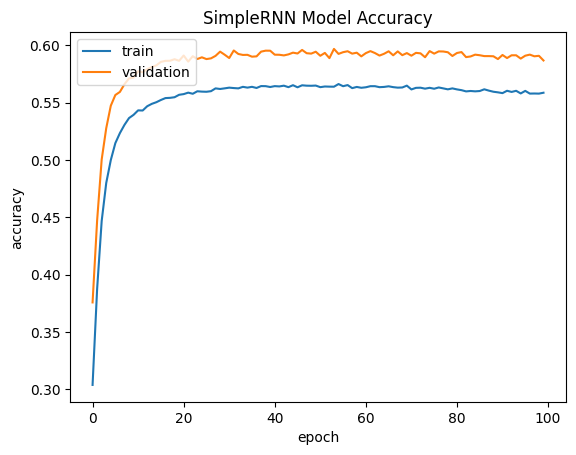

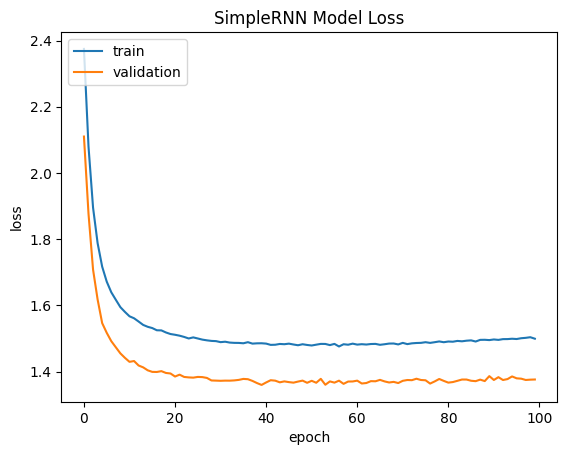

1239/1239 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5888 - loss: 1.3661
Testing results for SimpleRNN model: [1.3765268325805664, 0.5867403745651245]


In [27]:
# Train the new SimpleRNN model
history_simple_rnn = model_simple_rnn.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history_simple_rnn.history['accuracy'])
plt.plot(history_simple_rnn.history['val_accuracy'])
plt.title('SimpleRNN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_simple_rnn.history['loss'])
plt.plot(history_simple_rnn.history['val_loss'])
plt.title('SimpleRNN Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate the new model
results_simple_rnn = model_simple_rnn.evaluate(x_test, y_test)
print('Testing results for SimpleRNN model:', results_simple_rnn)


In [28]:
# Prediction for the next letter using the SimpleRNN model
predicted_char_simple_rnn = predict_next_char(model_simple_rnn, "natur ", chars_to_indices, indices_to_chars, maxlen)

print(f"The next character after 'natur ' is predicted to be '{predicted_char_simple_rnn}' using the SimpleRNN model")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
The next character after 'natur ' is predicted to be 'l' using the SimpleRNN model
